In [1]:
import numpy as np
import matplotlib.pyplot as pt

In [2]:
from PIL import Image

with Image.open("SiebelCtr_01.jpg") as img:
    rgb_img = np.array(img)
rgb_img.shape

(370, 552, 3)

In [3]:
img = np.sum(rgb_img, axis=-1)

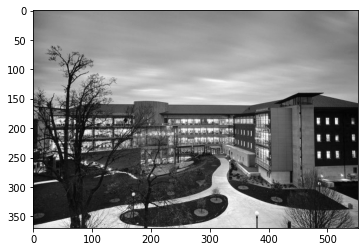

In [4]:
pt.imshow(img, cmap="gray")

In [5]:
img

array([[316, 316, 324, ..., 448, 451, 454],
       [313, 316, 324, ..., 451, 451, 451],
       [313, 316, 324, ..., 454, 451, 451],
       ...,
       [556, 555, 564, ..., 420, 451, 391],
       [547, 552, 572, ..., 274, 204, 117],
       [529, 534, 548, ...,  70,  78,  60]], dtype=uint64)

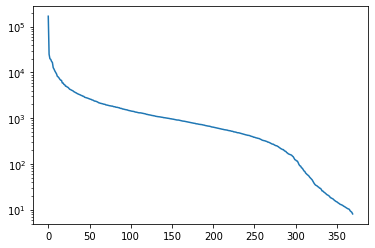

In [7]:
u, sigma, vt = np.linalg.svd(img)
sigma

pt.semilogy(sigma)

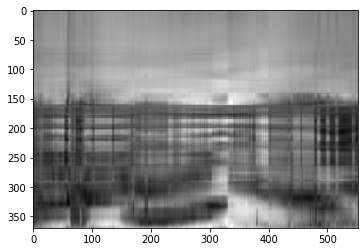

In [14]:

compressed_img = (
    sigma[0] * np.outer(u[:, 0], vt[0])
    + sigma[1] * np.outer(u[:, 1], vt[1])
    + sigma[2] * np.outer(u[:, 2], vt[2])
    + sigma[3] * np.outer(u[:, 3], vt[3])
    + sigma[4] * np.outer(u[:, 4], vt[4])
    + sigma[5] * np.outer(u[:, 5], vt[5])
    )

pt.imshow(compressed_img, cmap="gray")

In [18]:
u.shape

(370, 370)

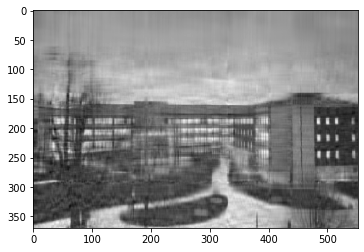

In [16]:
compressed_img = 0

for i in range(20):
    compressed_img += sigma[i] * np.outer(u[:, i], vt[i])

pt.imshow(compressed_img, cmap="gray")